In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication2

In [15]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 15

# Environment variables
N_LOANS = 2  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 3  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 2  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

# TODO: end and stop from updating when population becomes too small

# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)

for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)

y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

In [16]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(10)

<Axes: title={'center': 'Population scores over 11 time steps'}, xlabel='Step', ylabel='Score'>

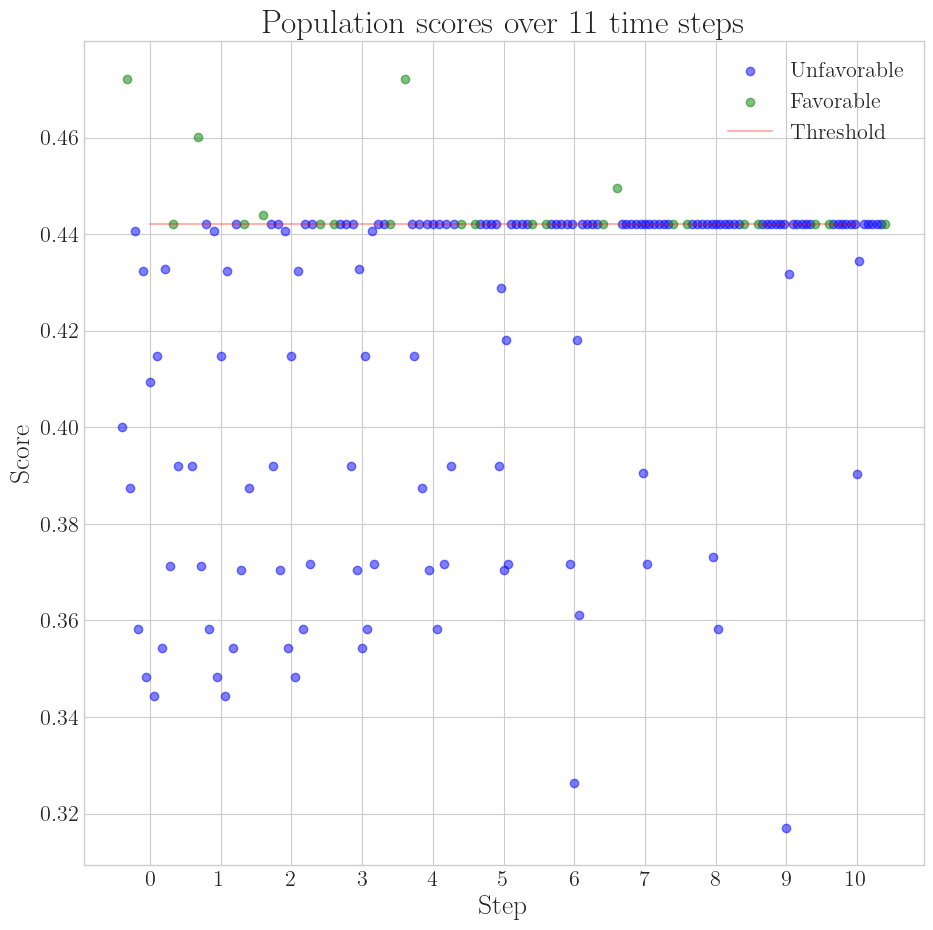

In [17]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

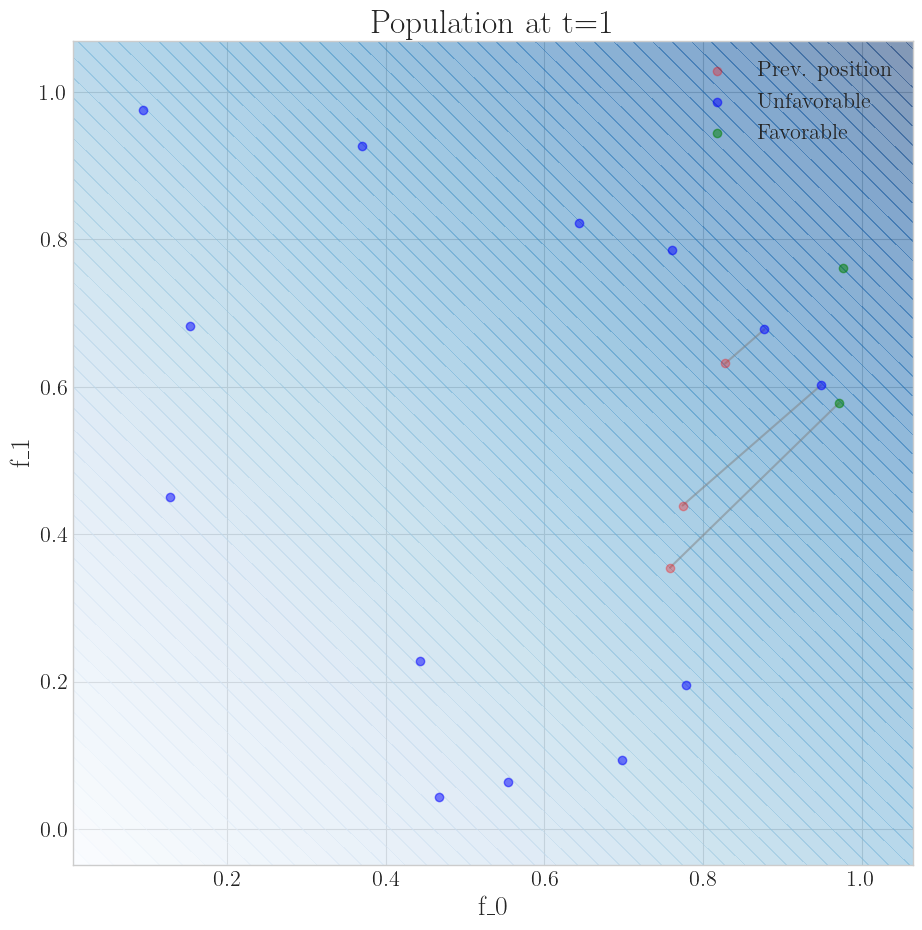

In [23]:
environment.plot.scatter(1)

In [ ]:
environment.plot.scores_histogram(0)

In [ ]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

In [ ]:
environment.plot.population_size()

In [ ]:
environment.success_rate(1, 20)

In [ ]:
environment.threshold_drift(1, 100)

In [ ]:
environment.agents_info()

In [ ]:
environment.metadata_[0]["threshold"]

In [ ]:
# probability of an agent to be above the threshold
p = environment.new_agent_proba(environment.metadata_[10]["threshold"])

# number of observations to generate to have 10 observations above threshold
n = 100 / p
n

In [ ]:
environment.steps_info()

In [ ]:
environment.steps_info().success_rate.plot.line()